# SEGMENTATION PROJECT

## Importing all the necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt           
import scipy.stats as stats
import statsmodels.formula.api as smf

#import packages for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

## Importing the data from an external source into the Python environment

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.shape

(8950, 18)

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Missing value Treatment

In [6]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df['CREDIT_LIMIT'].value_counts()

CREDIT_LIMIT
3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: count, Length: 205, dtype: int64

In [8]:
 df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median()) 

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
df['MINIMUM_PAYMENTS'].value_counts()

MINIMUM_PAYMENTS
299.351881      2
342.286490      1
184.464721      1
276.486072      1
309.140865      1
354.281114      1
216.090433      1
277.546713      1
150.317143      1
1600.269170     1
324.954747      1
211.984193      1
616.862544      1
6404.855484     1
271.528169      1
229.411418      1
3269.298234     1
179.182583      1
883.685949      1
3011.099397     1
184.444816      1
189.162675      1
190.513321      1
702.052491      1
137.434620      1
739.344097      1
245.422018      1
1102.054684     1
492.497922      1
1315.479892     1
88.589314       1
1364.816672     1
250.871811      1
139.509787      1
780.780114      1
4553.156050     1
381.469040      1
135.413354      1
438.470950      1
2962.908954     1
645.775344      1
3457.886177     1
158.022532      1
495.317878      1
535.262291      1
390.098144      1
992.707868      1
1145.197102     1
163.396716      1
69.987515       1
357.783692      1
150.804339      1
141.103713      1
399.881036      1
269.844517 

In [11]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [12]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Data Duplicacy: Chech if their is duplicate data or not

In [13]:
df.duplicated().sum()

0

In [14]:
df_1 = df.copy()

In [15]:
df_1 = df_1.drop(columns='CUST_ID')

In [16]:
df_1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
# standardize the data
sc = StandardScaler()
df_z = sc.fit_transform(df_1)
df_z = pd.DataFrame(df_z)
df_z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [18]:
df_z.columns = df_1.columns

In [19]:
df_z.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [20]:
df_z.shape

(8950, 17)

## Dimensionality reduction: applying PCA

In [21]:
df_z.shape

(8950, 17)

In [22]:
pc = PCA( n_components = 17 ).fit( df_z )

In [23]:
pc.explained_variance_   # eigen values

array([4.64112269e+00, 3.45372843e+00, 1.49840831e+00, 1.27166123e+00,
       1.05832222e+00, 9.75918638e-01, 8.30275112e-01, 7.30946222e-01,
       6.45776132e-01, 5.23658895e-01, 4.03327742e-01, 3.01506526e-01,
       2.42762789e-01, 2.06899443e-01, 1.72172632e-01, 4.54009954e-02,
       1.16501572e-05])

In [24]:
# eigen values
sum(pc.explained_variance_)

17.0018996535926

In [25]:
pc.explained_variance_ / sum(pc.explained_variance_)

array([2.72976713e-01, 2.03137796e-01, 8.81318170e-02, 7.47952439e-02,
       6.22472925e-02, 5.74005645e-02, 4.88342555e-02, 4.29920325e-02,
       3.79825870e-02, 3.08000227e-02, 2.37225104e-02, 1.77336964e-02,
       1.42785685e-02, 1.21691956e-02, 1.01266703e-02, 2.67034839e-03,
       6.85226796e-07])

In [26]:
# amount of variance that each PC explains
pc.explained_variance_ratio_

array([2.72976713e-01, 2.03137796e-01, 8.81318170e-02, 7.47952439e-02,
       6.22472925e-02, 5.74005645e-02, 4.88342555e-02, 4.29920325e-02,
       3.79825870e-02, 3.08000227e-02, 2.37225104e-02, 1.77336964e-02,
       1.42785685e-02, 1.21691956e-02, 1.01266703e-02, 2.67034839e-03,
       6.85226796e-07])

In [27]:
# cumulative variance explained
var = np.round( np.cumsum( pc.explained_variance_ratio_) * 100, 2 )
var

array([ 27.3 ,  47.61,  56.42,  63.9 ,  70.13,  75.87,  80.75,  85.05,
        88.85,  91.93,  94.3 ,  96.08,  97.5 ,  98.72,  99.73, 100.  ,
       100.  ])

In [28]:
pd.DataFrame({'Eigen_Values': pc.explained_variance_, 
                  'VAR': np.round(pc.explained_variance_ratio_*100, 2), 
                      'Cumm_VAR': var}, index = range(1, 18))

,Eigen_Values,VAR,Cumm_VAR
1,4.641123,27.30,27.30
2,3.453728,20.31,47.61
3,1.498408,8.81,56.42
4,1.271661,7.48,63.90
5,1.058322,6.22,70.13
6,0.975919,5.74,75.87
7,0.830275,4.88,80.75
8,0.730946,4.30,85.05
9,0.645776,3.80,88.85
10,0.523659,3.08,91.93


In [29]:
pc_final = PCA( n_components =6 ).fit( df_z )

In [30]:
pc_final

PCA(n_components=6)

In [31]:
pc_final.explained_variance_

array([4.64112269, 3.45372843, 1.49840831, 1.27166123, 1.05832222,
       0.97591864])

In [32]:
df_z.shape

(8950, 17)

In [33]:
reduced_cr = pc_final.transform(df_z )

In [34]:
dimensions = pd.DataFrame(reduced_cr)

In [35]:
dimensions.shape

(8950, 6)

In [36]:
dimensions.columns = [ "C1", "C2", "C3", "C4", "C5", "C6" ]

In [37]:
pd.DataFrame( df_z ).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [38]:
dimensions.head()

,C1,C2,C3,C4,C5,C6
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004


## Clustering

In [39]:
dimensions.shape

(8950, 6)

In [40]:
km_3=KMeans(n_clusters =3, random_state = 123 ).fit(dimensions)

C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
km_3.labels_

array([1, 0, 1, ..., 1, 1, 1])

In [42]:
km_3

KMeans(n_clusters=3, random_state=123)

In [43]:
y = pd.DataFrame(km_3.labels_)

In [44]:
y

,0
0,1
1,0
2,1
3,1
4,1
5,1
6,2
7,1
8,1
9,1


In [45]:
dimensions.shape

(8950, 6)

In [46]:
y.shape

(8950, 1)

In [47]:
dimensions['Target'] = y

In [48]:
dimensions.head()

,C1,C2,C3,C4,C5,C6,Target
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,1
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,0
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,1
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,1
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,1


In [49]:
km_4 = KMeans( n_clusters = 4, random_state = 123).fit( dimensions )
km_5 = KMeans( n_clusters = 5, random_state = 123).fit( dimensions )
km_6 = KMeans( n_clusters = 6, random_state = 123).fit( dimensions )
km_7 = KMeans( n_clusters = 7, random_state = 123).fit( dimensions )
km_8 = KMeans( n_clusters = 8, random_state = 123).fit( dimensions )
km_9 = KMeans( n_clusters = 9, random_state = 123).fit( dimensions )
km_10 = KMeans( n_clusters = 10, random_state = 123).fit( dimensions )

C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

In [50]:
# save the cluster labels and sort by cluster
df_z['cluster_3'] = km_3.labels_
df_z['cluster_4'] = km_4.labels_
df_z['cluster_5'] = km_5.labels_
df_z['cluster_6'] = km_6.labels_
df_z['cluster_7'] = km_7.labels_
df_z['cluster_8'] = km_8.labels_
df_z['cluster_9'] = km_9.labels_
df_z['cluster_10'] = km_10.labels_

In [51]:
df_z.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,1,1,0,2,1,2,3,2
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,0,3,3,5,4,3,1,7
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,1,2,1,0,0,0,6,9
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,1,1,0,2,1,2,3,2
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,1,1,0,2,1,2,3,2
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740504,-0.115060,0.669767,-0.525551,0.36068,1,2,1,0,0,6,2,1
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475157,1.596313,-0.277297,2.893453,0.36068,2,0,4,4,6,4,4,4
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.603083,-0.364116,-0.134127,-0.525551,0.36068,1,2,1,0,0,6,2,1
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688678,-0.360933,-0.228470,-0.525551,0.36068,1,1,0,2,1,2,3,2
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788050,-0.196336,-0.319208,-0.525551,0.36068,1,1,0,2,1,1,0,8


## Quantitative evaluation of number of clusters

### 1. Analysis of the cluster size | Count method

In [52]:
pd.Series(km_3.labels_).value_counts()

1    6141
0    1586
2    1223
Name: count, dtype: int64

In [53]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.686145
0    0.177207
2    0.136648
Name: count, dtype: float64

In [54]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

1    0.433296
2    0.356089
3    0.154637
0    0.055978
Name: count, dtype: float64

In [55]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

0    0.413408
1    0.302682
3    0.152179
4    0.122905
2    0.008827
Name: count, dtype: float64

In [56]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

2    0.385363
0    0.281341
5    0.136648
4    0.115754
1    0.072514
3    0.008380
Name: count, dtype: float64

In [57]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

1    0.363017
0    0.277989
4    0.136648
6    0.110056
3    0.071620
2    0.034413
5    0.006257
Name: count, dtype: float64

In [58]:
pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())

2    0.306480
6    0.211061
1    0.131844
0    0.124134
3    0.111173
7    0.067821
4    0.044134
5    0.003352
Name: count, dtype: float64

In [59]:
pd.Series(km_9.labels_).value_counts()/sum(pd.Series(km_9.labels_).value_counts())

3    0.269385
2    0.204693
1    0.132849
0    0.128268
6    0.126034
7    0.066927
4    0.036089
5    0.032514
8    0.003240
Name: count, dtype: float64

In [60]:
pd.Series(km_10.labels_).value_counts()/sum(pd.Series(km_10.labels_).value_counts())

2    0.263687
1    0.202123
7    0.132402
8    0.127933
9    0.119888
0    0.066704
4    0.047933
3    0.031508
5    0.004469
6    0.003352
Name: count, dtype: float64

In [61]:
km_4.inertia_

64079.21934905177

In [62]:
km_5.inertia_

57206.86732127589

In [63]:
km_6.inertia_

52362.44892500067

## 2. Elbow Analysis

**Method to understand how much variance is explained by increase of each cluster**

In [64]:
from sklearn import metrics
cluster_range = range( 2, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters ).fit( dimensions )
    cluster_errors.append( clusters.inertia_ )

C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

In [65]:
clusters_df = pd.DataFrame( { "num_clusters": cluster_range, "cluster_errors": cluster_errors } )
clusters_df.head(5)

,num_clusters,cluster_errors
0,2,93359.215639
1,3,75637.893576
2,4,64079.219349
3,5,57206.832001
4,6,52362.448925


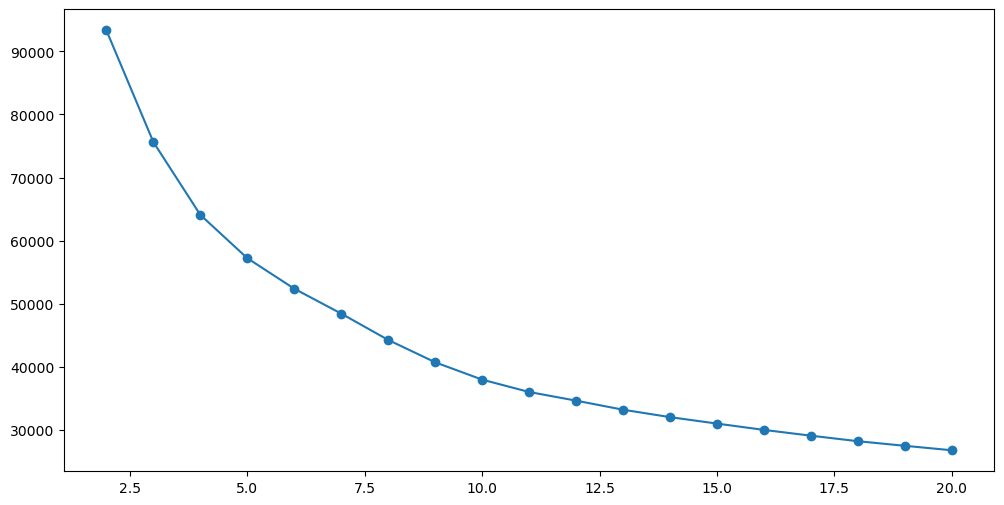

In [66]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

## Segment Distribution

In [67]:
df_z.cluster_5.value_counts()/sum(df_z.cluster_5.value_counts())

cluster_5
0    0.413408
1    0.302682
3    0.152179
4    0.122905
2    0.008827
Name: count, dtype: float64

## 3. Choosing number clusters using Silhouette Coefficient -- SC

**method of interpretation and validation of consistency within clusters of data**

In [68]:
# calculate SC for K=4
from sklearn import metrics
metrics.silhouette_score( dimensions, km_4.labels_ )

0.26149624660170984

In [69]:
# calculate SC for K=4 
k_range = range(3, 18)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 123)
    km.fit( dimensions )
    scores.append( metrics.silhouette_score(dimensions, km.labels_) )

C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gaya Gopan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

In [70]:
scores

[0.31444524557577225,
 0.26149624660170984,
 0.2533271037005442,
 0.26737298875940313,
 0.2656988307779202,
 0.266740271473351,
 0.2681006124308711,
 0.2707931739349696,
 0.2681146573875481,
 0.2645528324551518,
 0.25080607255457643,
 0.2513088250477017,
 0.2563365121354037,
 0.2597952220652486,
 0.25646949760703697]

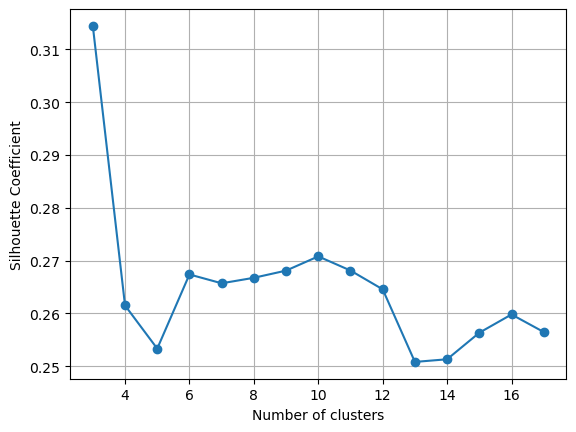

In [71]:
# plot the results
plt.plot(k_range, scores, marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

## Segment Distribution

In [72]:
df_z.cluster_6.value_counts()/sum(df_z.cluster_6.value_counts())

cluster_6
2    0.385363
0    0.281341
5    0.136648
4    0.115754
1    0.072514
3    0.008380
Name: count, dtype: float64